In [1]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chair = cv2.imread('chair.jpg')
wallet = cv2.imread('wallet.jpg')

In [96]:
chair_gray = cv2.cvtColor(chair, cv2.COLOR_BGR2GRAY)
chair_preprocessed = cv2.GaussianBlur(chair_gray, (5, 5), 0)

wallet_gray = cv2.cvtColor(wallet, cv2.COLOR_BGR2GRAY)
wallet_preprocessed = cv2.GaussianBlur(zz_morph, (5, 5), 0)

In [97]:
_, chair_binary = cv2.threshold(chair_preprocessed, 130, 255, cv2.THRESH_BINARY)
_, wallet_binary = cv2.threshold(wallet_preprocessed, 130, 255, cv2.THRESH_BINARY)

In [98]:
chair_binary = cv2.bitwise_not(chair_binary)
wallet_binary = cv2.bitwise_not(wallet_binary)

In [158]:
chair_edges = cv2.Canny(chair_preprocessed, threshold1=130, threshold2=180)
wallet_edges = cv2.Canny(zz_morph, threshold1=60, threshold2=80)
show_chair = cv2.cvtColor(chair_edges, cv2.COLOR_GRAY2RGB)
show_wallet = cv2.cvtColor(wallet_edges, cv2.COLOR_GRAY2RGB)

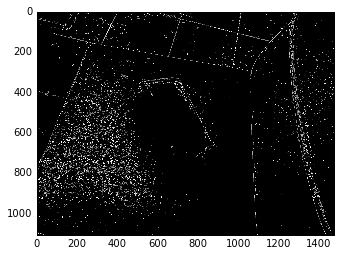

In [159]:
plt.imshow(cv2.cvtColor(wallet_edges, cv2.COLOR_GRAY2RGB))

In [56]:
cv2.imwrite('chair_edges.jpg', chair_edges)
cv2.imwrite('wallet_edges.jpg', wallet_edges)

True

In [84]:
wallet_lines = np.copy(wallet)

# find hough lines
num_pix_threshold = 30
lines = cv2.HoughLines(wallet_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
 
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
 
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(wallet_lines, (x1,y1), (x2,y2), (0,0,255), 1)

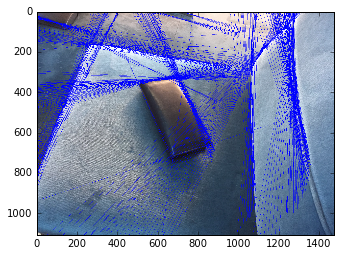

In [85]:
plt.imshow(wallet_lines)

In [86]:
chair_lines = np.copy(chair)

# find hough lines
num_pix_threshold = 30
lines = cv2.HoughLines(chair_edges, 1, np.pi/180, num_pix_threshold)

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
 
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
 
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
 
    cv2.line(chair_lines, (x1,y1), (x2,y2), (0,0,255), 1)

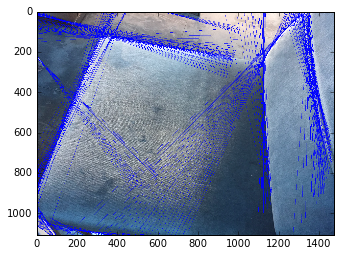

In [87]:
plt.imshow(chair_lines)

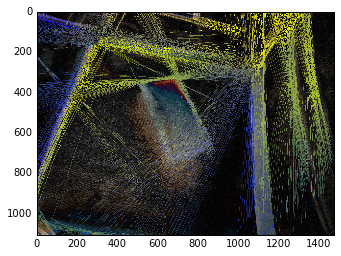

In [88]:
plt.imshow(cv2.absdiff(wallet_lines, chair_lines))

In [89]:
def morph(img):
    kernel = np.ones((3, 3),np.uint8)
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
    return opened

In [94]:
zz_morph = morph(wallet_gray)

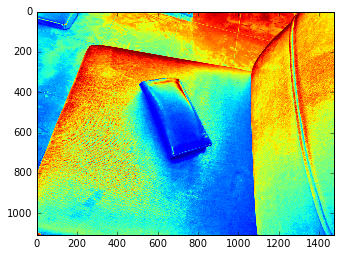

In [93]:
plt.imshow(wallet_gray)

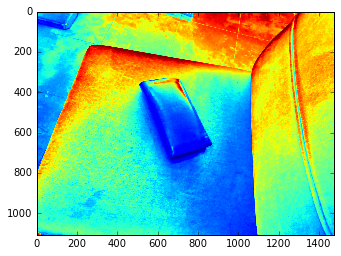

In [95]:
plt.imshow(zz_morph)